In [1]:
import keras

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from keras.models import Sequential

In [4]:
from keras.layers import Conv2D, MaxPooling2D

In [5]:
from keras.layers import Activation, Dropout, Flatten, Dense

In [6]:
from keras import backend as K

In [7]:
import numpy as np

In [8]:
from keras.preprocessing import image

In [9]:
img_width, img_height = 150, 150
train_data_dir = 'C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/train'        
validation_data_dir = 'C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/test'
nb_train_samples = 8000        
nb_validation_samples = 1600   
epochs = 8                  
batch_size = 60

In [10]:
if K.image_data_format() == 'channels_first':

    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3) 


train_datagen = ImageDataGenerator(
rescale=1. / 255,   
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [11]:
test_datagen =ImageDataGenerator (rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode ='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
) 

Found 8000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.summary ()

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model. summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
______________________________________

In [13]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add (Dense(1))
model.add(Activation('sigmoid'))

model. summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer ='rmsprop',
              metrics=['accuracy'])

In [15]:
model.fit_generator(
train_generator,
steps_per_epoch=nb_train_samples // batch_size,
epochs =epochs,
validation_data= validation_generator,
validation_steps =nb_validation_samples // batch_size)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
133/133 [==============================] - 122s 916ms/step - loss: 0.5776 - accuracy: 0.7189
Epoch 2/8
133/133 [==============================] - 123s 927ms/step - loss: 0.4944 - accuracy: 0.8065
Epoch 3/8
133/133 [==============================] - 120s 902ms/step - loss: 0.4275 - accuracy: 0.8220
Epoch 4/8
133/133 [==============================] - 119s 897ms/step - loss: 0.4063 - accuracy: 0.8351
Epoch 5/8
133/133 [==============================] - 120s 900ms/step - loss: 0.4102 - accuracy: 0.8469
Epoch 6/8
133/133 [==============================] - 123s 927ms/step - loss: 0.3758 - accuracy: 0.8453
Epoch 7/8
133/133 [==============================] - 125s 940ms/step - loss: 0.3650 - accuracy: 0.8508
Epoch 8/8
133/133 [==============================] - 121s 909ms/step - loss: 0.3527 - accuracy: 0.8587


# Prediction
Input 1: 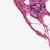


In [16]:
#prediction 1,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


Input 2: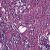

In [17]:
#Prediction 2,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Malign"

print (prediction)

[[1.]]
Malign


# 

# Prediction for 100 images

In [18]:
#Try 3,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try3_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [19]:
#Try 4,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try4_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [20]:
#Try 5,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try5_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [21]:
#Try 6,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try6_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [22]:
#Try 7,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try7_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [23]:
#Try 8,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try8_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [24]:
#Try 9,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try9_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [25]:
#Try 10,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try10_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [26]:
#Try 11,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try11_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [27]:
#Try 12,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try12_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [28]:
#Try 13,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try13_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [29]:
#Try 14,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try14_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [30]:
#Try 15,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try15_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [31]:
#Try 16,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try16_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [32]:
#Try 17,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try17_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [33]:
#Try 18,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try18_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [34]:
#Try 19,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try19_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [35]:
#Try 20,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try20_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [36]:
#Try 21,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try21_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [37]:
#Try 22,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try22_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [38]:
#Try 23,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try23_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [39]:
#Try 24,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try24_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [40]:
#Try 25,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try25_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [41]:
#Try 26,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try26_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [42]:
#Try 27,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try27_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.1098077e-08]]
Mallign


In [43]:
#Try 28,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try28_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [44]:
#Try 29,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try29_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [45]:
#Try 30,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try30_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [46]:
#Try 31,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try31_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [47]:
#Try 32,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try32_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [48]:
#Try 33,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try33_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [49]:
#Try 34,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try34_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [50]:
#Try 35,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try35_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [51]:
#Try 36,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try36_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [52]:
#Try 37,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try37_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [53]:
#Try 38,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try38_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [54]:
#Try 39,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try39_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [55]:
#Try 40,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try40_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [56]:
#Try 41,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try41_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [57]:
#Try 42,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try42_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [58]:
#Try 43,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try43_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [59]:
#Try 44,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try44_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [60]:
#Try 45 Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try45_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [61]:
#Try 46,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try46_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [62]:
#Try 47,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try47_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [63]:
#Try 48,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try48_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [64]:
#Try 49,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try49_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [65]:
#Try 50,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try50_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [66]:
#Try 51,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try51_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [67]:
#Try 52,Expecting class 0 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/try52_class0.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [68]:
#Try 53,Expecting class 1 benign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try53_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [69]:
#Try 54,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try54_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [70]:
#Try 55,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try55_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [71]:
#Try 56,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try56_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [72]:
#Try 57,Expecting class 1malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try57_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [73]:
#Try 58,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try58_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [74]:
#Try 59,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try59_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [75]:
#Try 60,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try60_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [76]:
#Try 61,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try61_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [77]:
#Try 62,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try62_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [78]:
#Try 63,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try63_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [79]:
#Try 64,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try64_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [80]:
#Try 65,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try65_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [81]:
#Try 66,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try66_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [82]:
#Try 67,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try67_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [83]:
#Try 68,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try68_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [84]:
#Try 69,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try69_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [85]:
#Try 70,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try70_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [86]:
#Try 71,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try71_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [87]:
#Try 72,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try72_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [88]:
#Try 73,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try73_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[0.]]
Benign


In [89]:
#Try 74,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try74_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [90]:
#Try 75,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try75_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [91]:
#Try 76,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try76_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [92]:
#Try 77,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try77_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [93]:
#Try 78,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try78_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [94]:
#Try 79,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try79_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [95]:
#Try 80,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try80_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [96]:
#Try 81,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try81_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [97]:
#Try 82,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try82_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [98]:
#Try 83,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try83_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)

[[1.]]
Mallign


In [99]:
#Try 84,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try84_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [100]:
#Try 85,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try85_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [101]:
#Try 86,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try80_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [102]:
#Try 87,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try87_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [103]:
#Try 88,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try88_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [104]:
#Try 89,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try89_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [105]:
#Try 90,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try90_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [106]:
#Try 91,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try91_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [107]:
#Try 92,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try92_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [108]:
#Try 93,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try93_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)



[[1.]]
Mallign


In [109]:
#Try 94,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try94_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)



[[1.]]
Mallign


In [110]:
#Try 95,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try95_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [111]:
#Try 96,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try96_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [112]:
#Try 97,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try97_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)



[[1.]]
Mallign


In [113]:
#Try 98,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try98_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [114]:
#Try 99,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try99_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [115]:
#Try 100,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try100_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [116]:
#Try 101,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try101_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"

print (prediction)


[[1.]]
Mallign


In [117]:
#Try 102,Expecting class 1 malign result
model.save_weights('first_try.h5'),

img_pred = image.load_img('C:/Users/Anju Satheesh/Dropbox/My PC (LAPTOP-N0RD666U)/Desktop/mini_project/masterwork/validation/New folder/try102_class1.png', target_size = (150, 150))  
image_pred = image. img_to_array(img_pred)
img_pred = np.expand_dims( img_pred, axis =0 )

#Testing
result=model.predict(img_pred)
print (result)
if result[0][0]==0:
    prediction = "Benign"

else:
    prediction = "Mallign"


[[1.]]


# Confusion matrix and classification report

In [118]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [119]:
# actual values
actual = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
# predicted values
predicted = [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report 
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[44  7]
 [ 2 49]]
Outcome values : 
 44 7 2 49
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.86      0.91        51
           0       0.88      0.96      0.92        51

    accuracy                           0.91       102
   macro avg       0.92      0.91      0.91       102
weighted avg       0.92      0.91      0.91       102



In [120]:
from mlxtend.plotting import plot_confusion_matrix

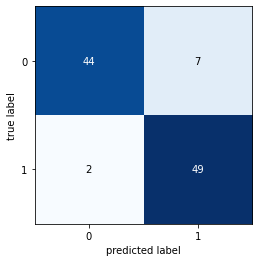

In [121]:
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array([[44, 7],
                   [2, 49]])

fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()